# Imagenes

## Gaussiano

tensor([[[[1.9652e-05, 2.3941e-04, 1.0730e-03, 1.7690e-03, 1.0730e-03,
           2.3941e-04, 1.9652e-05],
          [2.3941e-04, 2.9166e-03, 1.3071e-02, 2.1551e-02, 1.3071e-02,
           2.9166e-03, 2.3941e-04],
          [1.0730e-03, 1.3071e-02, 5.8582e-02, 9.6585e-02, 5.8582e-02,
           1.3071e-02, 1.0730e-03],
          [1.7690e-03, 2.1551e-02, 9.6585e-02, 1.5924e-01, 9.6585e-02,
           2.1551e-02, 1.7690e-03],
          [1.0730e-03, 1.3071e-02, 5.8582e-02, 9.6585e-02, 5.8582e-02,
           1.3071e-02, 1.0730e-03],
          [2.3941e-04, 2.9166e-03, 1.3071e-02, 2.1551e-02, 1.3071e-02,
           2.9166e-03, 2.3941e-04],
          [1.9652e-05, 2.3941e-04, 1.0730e-03, 1.7690e-03, 1.0730e-03,
           2.3941e-04, 1.9652e-05]]]])


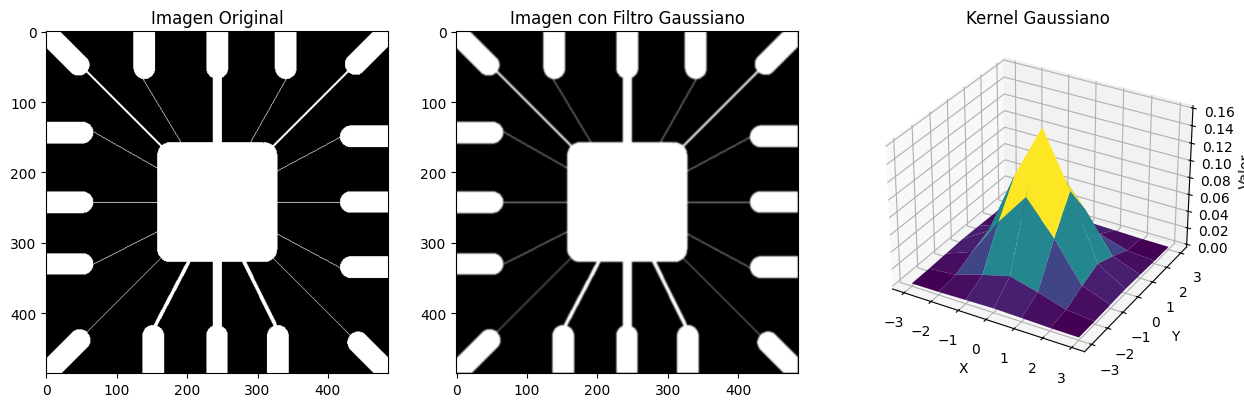

In [22]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os
#windows
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#set KMP_DUPLICATE_LIB_OK=True
#linux
#export KMP_DUPLICATE_LIB_OK=True

# Cargar y transformar la imagen
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(),  # Convertir a escala de grises
        transforms.ToTensor()    # Convertir a tensor
    ])
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Añadir un batch dimension
    return image

# Crear el filtro Gaussiano
def gaussian_kernel(size, sigma):
    x = torch.arange(-size // 2 + 1., size // 2 + 1.)
    x = x.repeat(size, 1)
    y = x.t()
    kernel = torch.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= kernel.sum()  # Normalizar el kernel
    return kernel.unsqueeze(0).unsqueeze(0)

# Aplicar el filtro Gaussiano
def apply_gaussian_filter(image, kernel):
    return F.conv2d(image, kernel, padding=kernel.size(-1) // 2)

# Parámetros del filtro Gaussiano
kernel_size = 7  # Tamaño del kernel
sigma = 1      # Desviación estándar

# Cargar imagen
image_path = 'fig2.jpg'
image = load_image(image_path)

# Crear y aplicar el filtro Gaussiano
gaussian_kernel = gaussian_kernel(kernel_size, sigma)
blurred_image = apply_gaussian_filter(image, gaussian_kernel)

x = torch.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
y = x.clone()
X, Y = torch.meshgrid(x, y, indexing='xy')
Z = gaussian_kernel.squeeze()

#imprimir filtro
print(gaussian_kernel)

fig = plt.figure(figsize=(15, 5))

# Imagen original
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Imagen Original')
ax1.imshow(image.squeeze(), cmap='gray')

# Imagen filtrada
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Imagen con Filtro Gaussiano')
ax2.imshow(blurred_image.squeeze().detach().numpy(), cmap='gray')

# Kernel 3D
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap='viridis')
ax3.set_title('Kernel Gaussiano')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Valor')

plt.show()

## Mexican Hat

tensor([[[[-0.0004, -0.0007, -0.0011, -0.0016, -0.0019, -0.0021, -0.0019,
           -0.0016, -0.0011, -0.0007, -0.0004],
          [-0.0007, -0.0013, -0.0021, -0.0026, -0.0029, -0.0029, -0.0029,
           -0.0026, -0.0021, -0.0013, -0.0007],
          [-0.0011, -0.0021, -0.0028, -0.0026, -0.0016, -0.0010, -0.0016,
           -0.0026, -0.0028, -0.0021, -0.0011],
          [-0.0016, -0.0026, -0.0026, -0.0002,  0.0038,  0.0058,  0.0038,
           -0.0002, -0.0026, -0.0026, -0.0016],
          [-0.0019, -0.0029, -0.0016,  0.0038,  0.0114,  0.0152,  0.0114,
            0.0038, -0.0016, -0.0029, -0.0019],
          [-0.0021, -0.0029, -0.0010,  0.0058,  0.0152,  0.0197,  0.0152,
            0.0058, -0.0010, -0.0029, -0.0021],
          [-0.0019, -0.0029, -0.0016,  0.0038,  0.0114,  0.0152,  0.0114,
            0.0038, -0.0016, -0.0029, -0.0019],
          [-0.0016, -0.0026, -0.0026, -0.0002,  0.0038,  0.0058,  0.0038,
           -0.0002, -0.0026, -0.0026, -0.0016],
          [-0.0011, -0.0

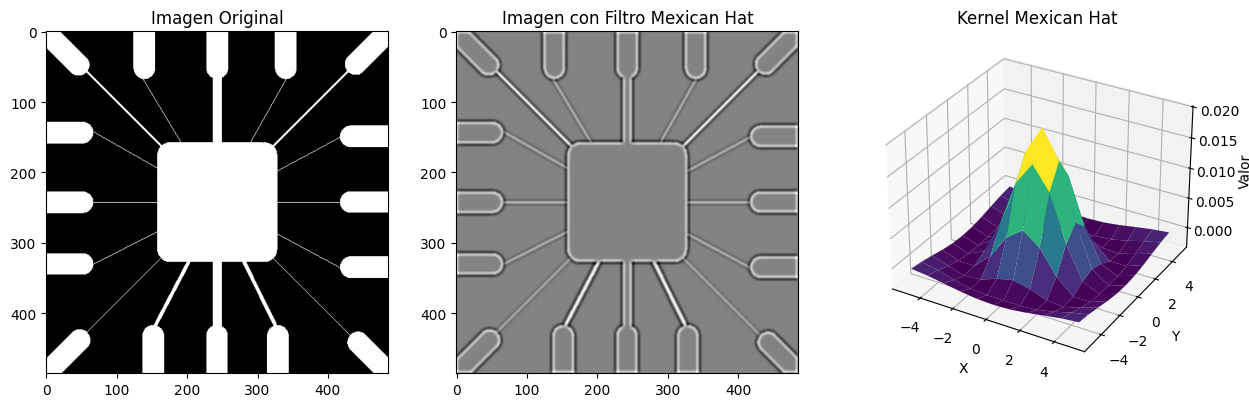

In [30]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os
#windows
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#set KMP_DUPLICATE_LIB_OK=True
#linux
#export KMP_DUPLICATE_LIB_OK=True

# Cargar y transformar la imagen
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(),  # Convertir a escala de grises
        transforms.ToTensor()    # Convertir a tensor
    ])
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Añadir un batch dimension
    return image

# Crear el filtro Gaussiano
def mexican_hat(kernel_size=21, sigma=3.0):
    """
    Genera un filtro Mexican Hat (Laplacian of Gaussian) como tensor de Torch.

    Parámetros:
        kernel_size (int): tamaño del kernel (impar recomendado).
        sigma (float): desviación estándar de la gaussiana.

    Retorna:
        torch.Tensor: filtro 2D normalizado.
    """
    # Crear coordenadas
    ax = torch.arange(-(kernel_size // 2), kernel_size // 2 + 1, dtype=torch.float32)
    xx, yy = torch.meshgrid(ax, ax, indexing="ij")

    # Fórmula del Mexican Hat (LoG)
    r2 = xx**2 + yy**2
    norm = 1 / (torch.pi * sigma**4)
    kernel = norm * (1 - r2 / (2 * sigma**2)) * torch.exp(-r2 / (2 * sigma**2))

    # Normalizar para que la suma sea cero (característica de LoG)
    kernel -= kernel.mean()

    return kernel.unsqueeze(0).unsqueeze(0)

# Aplicar el filtro Gaussiano
def apply_MH_filter(image, kernel):
    return F.conv2d(image, kernel, padding=kernel.size(-1) // 2)

# Parámetros del filtro Gaussiano
kernel_size = 11  # Tamaño del kernel
sigma = 2      # Desviación estándar

# Cargar imagen
image_path = 'fig2.jpg'
image = load_image(image_path)

# Crear y aplicar el filtro Gaussiano
mh_kernel = mexican_hat(kernel_size, sigma)
blurred_image = apply_MH_filter(image, mh_kernel)

x = torch.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
y = x.clone()
X, Y = torch.meshgrid(x, y, indexing='xy')
Z = mh_kernel.squeeze()

#imprimir filtro
print(mh_kernel)

fig = plt.figure(figsize=(15, 5))

# Imagen original
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Imagen Original')
ax1.imshow(image.squeeze(), cmap='gray')

# Imagen filtrada
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Imagen con Filtro Mexican Hat')
ax2.imshow(blurred_image.squeeze().detach().numpy(), cmap='gray')

# Kernel 3D
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap='viridis')
ax3.set_title('Kernel Mexican Hat')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Valor')

plt.show()

## Ejercicio 1
Filtro Gaussiano: Cambiando el tamaño del kernel, mientras más cercano a 1, se divide solo en una sección, y a mayor valor, mayor cantidad de secciones para suavizar pero, mayor procesamiento. Sobre el valor de sigma, a mayor valor (1 o más) la imagen se ve más difuminada, como que se suaviza más. Mientras que si se acerca el sigma a 0, la imagen casi desaparece o no toma mucho suavizado y eso se puede ver reflejado en el grafico donde mientras la curva es más punteada o es más un plano cuadrático.

Filtro Mexicano:
Por un lado, sigma no puede ser 0 si no, se divide por 0 y hay error, por lo que decimos que tiende a 0. Si Sigma tiende a 0, tenemos un kernel más "puntiagudo" donde centra algunos pixeles solamente, mientras que, a mayor kernel, 5 o más, la imagen se suaviza sobre los pixeles aplicando un filtro a toda la imagen, no solo centrandose en el centro, si no en toda la imagen, contrario a Gaussiano donde se fija más en los pixeles centrales.
El tamaño del kernel tambien afecta ya que solo se puede dividir en determinada proporcion, contrario a Gaussiano donde podemos poner mayor valor para divir la imagen.

# Ejercicio 2

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 600, 600])


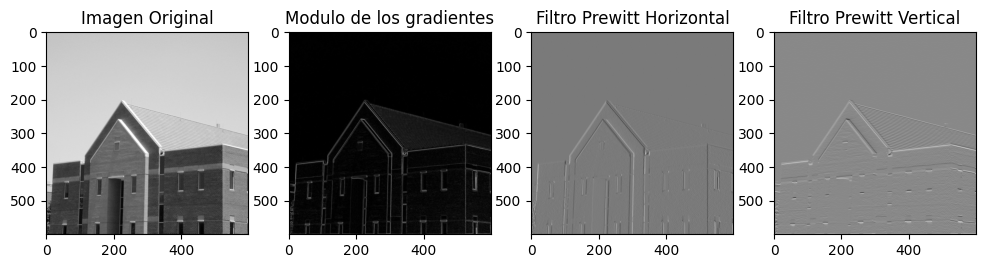

In [28]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Cargar y transformar la imagen
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(),  # Convertir a escala de grises
        transforms.ToTensor()    # Convertir a tensor
    ])
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Añadir un batch dimension
    return image

# Definir filtros de Prewitt
prewitt_x = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
prewitt_y = torch.tensor([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(prewitt_x.shape)

# Aplicar el filtro de convolución
def apply_prewitt_filter(image, kernel):
    return F.conv2d(image, kernel, padding=1)

# Cargar imagen
image_path = 'fig1.jpg'
image = load_image(image_path)
print(image.shape)

# Aplicar filtros de Prewitt
edges_x = apply_prewitt_filter(image, prewitt_x)
edges_y = apply_prewitt_filter(image, prewitt_y)

# Calcular la magnitud de los bordes
edges = torch.sqrt(edges_x ** 2 + edges_y ** 2)

# Visualizar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.title('Imagen Original')
plt.imshow(image.squeeze(), cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Filtro Prewitt Horizontal')
plt.imshow(edges_x.squeeze().detach().numpy(), cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Filtro Prewitt Vertical')
plt.imshow(edges_y.squeeze().detach().numpy(), cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Modulo de los gradientes')
plt.imshow(edges.squeeze().detach().numpy(), cmap='gray')

plt.show()

- Modulo de los gradientes: Invierte los valores de los pixeles y los tiennde a 0 o 255 (Blanco o Negro). Es decir, invierte la imagen.
- Filtro Prewitt Horizontal y Vertical: Resaltan los bordes:
  - Horizontal: Resalta los pixeles de manera horizontal. Actua de manera tal que, siendo un filtro, le da mayor importancia de evaluación a las filas ya que es horizontal.
  - Vertical: Inversamente, le da mayor interes a las columnas en el filtro, resaltando más las filas en un sentido vertical.

# Ejercicio 3

torch.Size([1, 1, 502, 564])


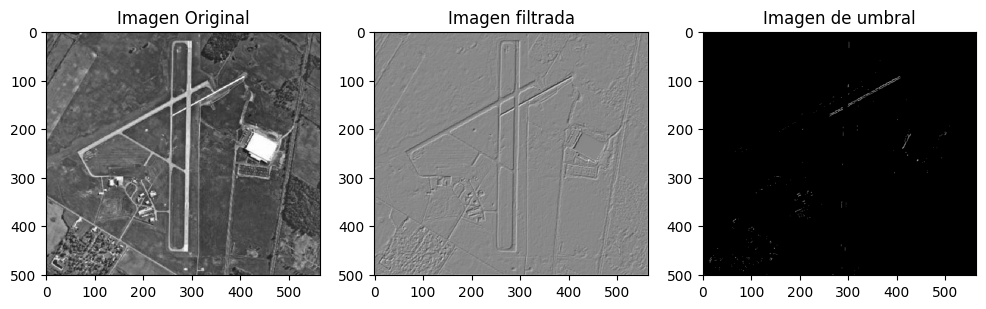

In [68]:
#  Dada la imagen de entrada fig3.jpg, determinar el filtro (entre k1, k2 y k3)
#  y el umbral utilizado tal que el resultado sea lo más similar posible
#  a la imagen binaria fig3-filtrada.png
#
#  Sugerencia: analizar primero cual es el filtro conveniente segun el resultado deseado
#  y luego determinar el umbral.

import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Cargar y transformar la imagen
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(),  # Convertir a escala de grises
        transforms.ToTensor()    # Convertir a tensor
    ])
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Añadir un batch dimension
    return image

#k1 =
#     1     1     1
#     1    -2     1
#    -1    -1    -1

#k2 =
#     3     3     3
#     3     0    -5
#     3    -5    -5

#k3 =
#    -5     3     3
#    -5     0     3
#    -5     3     3

# Filtros
k1 = torch.tensor([[1, 1, 1], [1, -2, 1], [-1, -1, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
k2 = torch.tensor([[3, 3, 3], [3, 0, -5], [3, -5, -5]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
k3 = torch.tensor([[-5, 3, 3], [-5, 0, 3], [-5, 3, 3]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Aplicar el filtro de convolución
def aplicar_filtro(image, kernel):
    return F.conv2d(image, kernel, padding=1)

def aplicar_umbral(image, umbral):
    # Función que dada una imagen de entrada (tensor) aplica el umbral retornando
    # una imagen binaria, con ceros en la pixeles que no superan el valor del umbral.

    thr_layer = torch.nn.Threshold(threshold=umbral,value=0)
    return thr_layer(image)

# Cargar imagen
image_path = 'fig3.jpg'
image = load_image(image_path)
print(image.shape)

# Aplicar filtro
imgfiltrada = aplicar_filtro(image, k2)

# Encontrar el mejor umbral!
thr_val = 4.5

# Aplicar umbral
imgthr = aplicar_umbral(torch.abs(imgfiltrada), thr_val)
#imgthr = imgfiltrada

# Visualizar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image.squeeze(), cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Imagen filtrada')
plt.imshow(imgfiltrada.squeeze().detach().numpy(), cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Imagen de umbral')
plt.imshow(imgthr.squeeze().detach().numpy(), cmap='gray')

plt.show()

Filtro=K2. Umbral=4.5.
K3 trabaja de manera inversa mientras que K1 solo aclara unos cuantos, el threshold tiene que incrementar mucho pero ignora ciertos puntos. El K2 al no trabajar totalmente con 1's puede incrementar determinados valores y, al estar en gris, los valores mas altos van a blanco y los más bajos a negro.

# Ejercicio 4

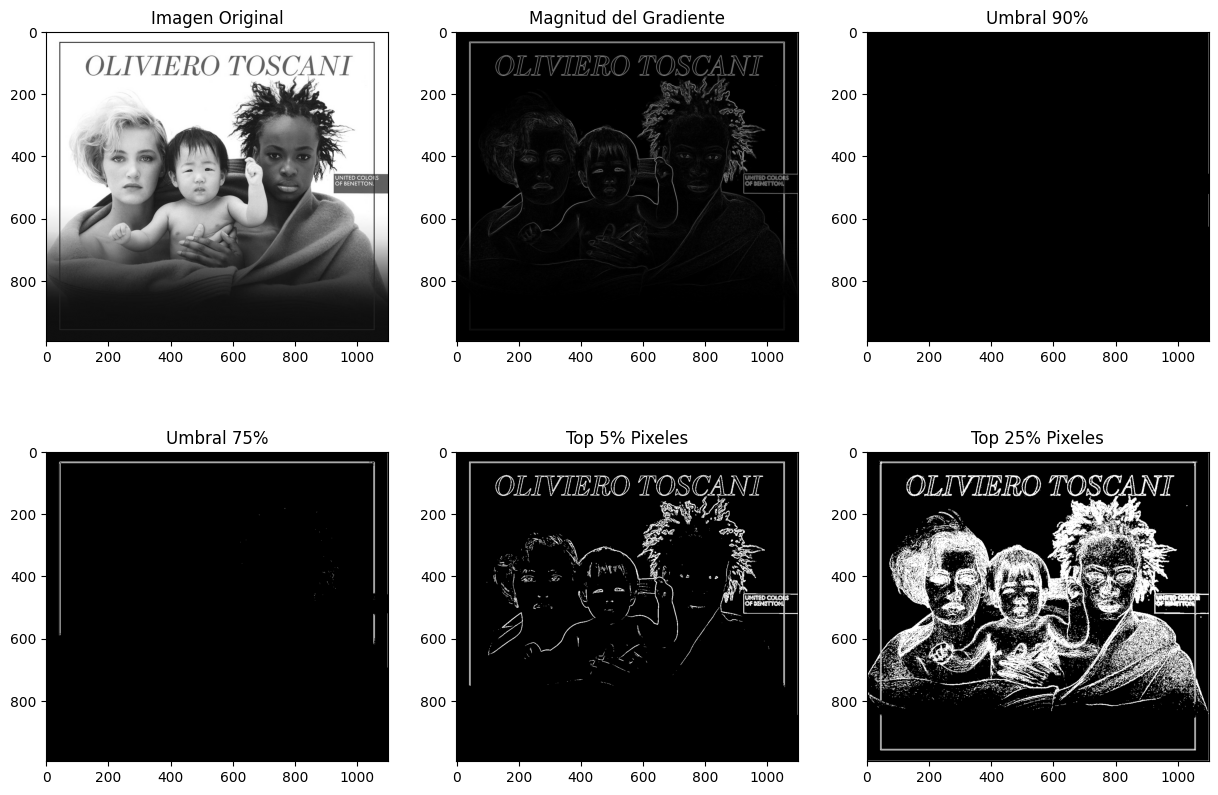

In [69]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

# Cargar y transformar la imagen
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(),  # Convertir a escala de grises
        transforms.ToTensor()    # Convertir a tensor
    ])
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Añadir un batch dimension
    return image

# Definir filtros de Sobel
sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Aplicar el filtro de convolución
def apply_sobel_filter(image, kernel):
    return F.conv2d(image, kernel, padding=1)

# Aplicar umbralización
def apply_threshold(image, threshold):
    return (image > threshold).float()

# Cargar imagen
image_path = 'ad-benneton.jpg'
image = load_image(image_path)

# Aplicar filtros de Sobel
edges_x = apply_sobel_filter(image, sobel_x)
edges_y = apply_sobel_filter(image, sobel_y)

# Calcular la magnitud de los bordes
edges_magnitude = torch.sqrt(edges_x ** 2 + edges_y ** 2)

# Binarización con diferentes umbrales

# 90% del máximo gradiente
threshold_90_percent = torch.max(edges_magnitude) * 0.9
binary_image_90 = apply_threshold(edges_magnitude, threshold_90_percent)

# 75% del máximo gradiente
threshold_75_percent = torch.max(edges_magnitude) * 0.75
binary_image_75 = apply_threshold(edges_magnitude, threshold_75_percent)

# 5% de los píxeles con mayor valor
flat_edges = edges_magnitude.view(-1)
sorted_edges, _ = torch.sort(flat_edges, descending=True)
threshold_top_5_percent = sorted_edges[int(0.05 * len(sorted_edges))]
binary_image_top_5 = apply_threshold(edges_magnitude, threshold_top_5_percent)

# 25% de los píxeles con mayor valor
threshold_top_25_percent = sorted_edges[int(0.25 * len(sorted_edges))]
binary_image_top_25 = apply_threshold(edges_magnitude, threshold_top_25_percent)


# Visualizar resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Imagen Original')
plt.imshow(image.squeeze(), cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Magnitud del Gradiente')
plt.imshow(edges_magnitude.squeeze().detach().numpy(), cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Umbral 90%')
plt.imshow(binary_image_90.squeeze().detach().numpy(), cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Umbral 75%')
plt.imshow(binary_image_75.squeeze().detach().numpy(), cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Top 5% Pixeles')
plt.imshow(binary_image_top_5.squeeze().detach().numpy(), cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Top 25% Pixeles')
plt.imshow(binary_image_top_25.squeeze().detach().numpy(), cmap='gray')

plt.show()